<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/Novel_pca_tsne_umap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Word2Vec Vectors from a novel in English

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
import re
import gensim
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already downloaded and convert to set for faster access
nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
stop_words=set()##do not remove stop words


# Modify the regular expression for non-alphanumeric characters removal to also remove newlines, carriage returns, and tabs
non_alpha_numeric_re = re.compile('[\n\r\t]|[^a-zA-Z0-9\s]+')

def preprocess_text(text):
    # Use the compiled regex to remove non-alphanumeric characters except for spaces, and also newlines, carriage returns, and tabs
    text = non_alpha_numeric_re.sub(' ', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords using the set for faster lookup
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Return the preprocessed text
    return ' '.join(filtered_words).strip()

def prepare_for_w2v(filename_from, filename_to, lang='english', use_sentence_tokenization=True):
    with open(filename_from, "r", encoding='utf-8') as file:
        raw_text = file.read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        # Check if sentence tokenization is used
        if use_sentence_tokenization:
            sentences = nltk.sent_tokenize(raw_text, language=lang)
        else:
            sentences = [raw_text]  # Treat the entire text as a single sentence

        for sentence in sentences:
            processed_sentence = preprocess_text(sentence.lower())
            print(processed_sentence, file=f)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, vector_size=300, window=5, min_count=1, workers=4)  # Adjusted workers to 4 for potential parallel processing improvement


In [10]:
# Example usage with sentence tokenization
# prepare_for_w2v('path_to_your_input_file.txt', 'train_english_text.txt', 'english', use_sentence_tokenization=True)

# Example usage without sentence tokenization
prepare_for_w2v(my_path+'The Golden Bowl', 'train_english_text.txt', 'english', use_sentence_tokenization=False)

model = train_word2vec('train_english_text.txt')

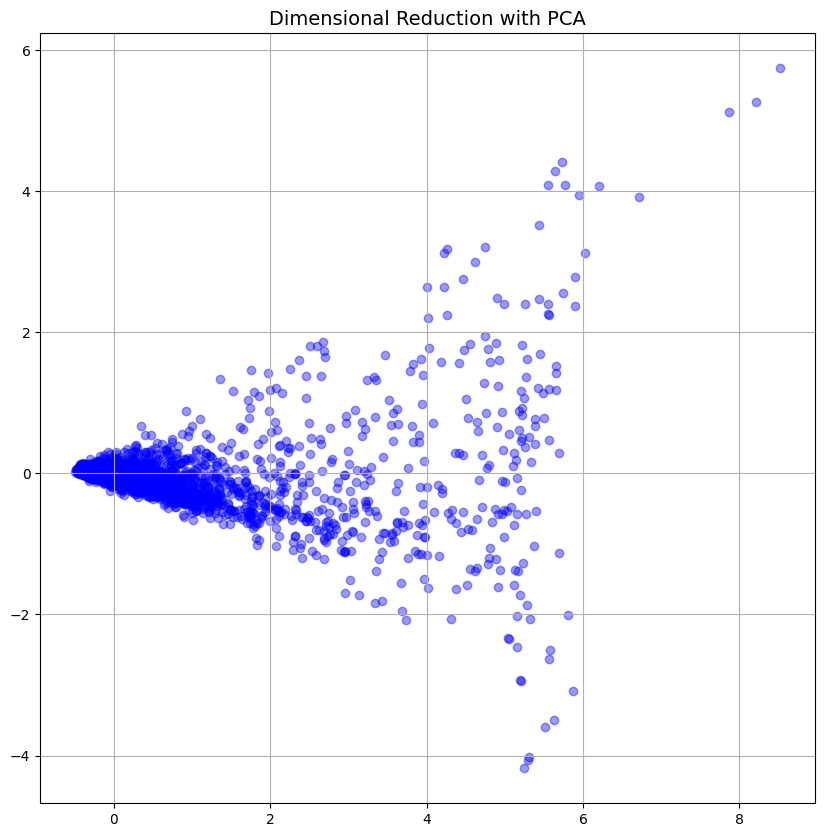

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Assuming your model is loaded in the variable `model`
# Step 2: Extract word vectors and their labels
words = list(model.wv.key_to_index.keys())  # adjust this if using an older version of gensim
word_vectors = model.wv[words]

# Step 3: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Step 4: Plot the reduced word vectors
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1],color='blue',alpha=0.4)
    # plt.text(reduced_vectors[i, 0]+0.03, reduced_vectors[i, 1]+0.03, word, fontsize=9)
plt.title("Dimensional Reduction with PCA", fontsize=14)
plt.grid(True)

plt.show()


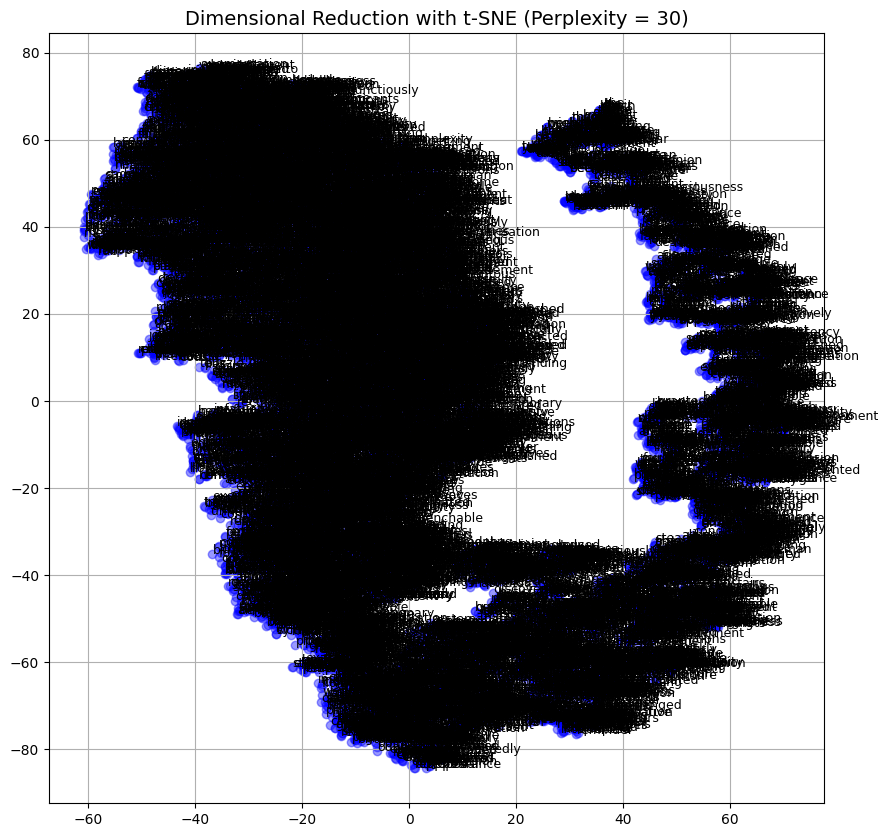

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Assuming your model is loaded in the variable `model`
# Step 2: Extract word vectors and their labels
words = list(model.wv.key_to_index.keys())  # adjust this if using an older version of gensim
word_vectors = model.wv[words]

# Step 3: Apply t-SNE with a specified perplexity value to reduce dimensions to 2
perplexity_value = 30  # Feel free to adjust this value
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors = tsne.fit_transform(word_vectors)

# Step 4: Plot the reduced word vectors and include perplexity in the title
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color='blue', alpha=0.4)
    plt.text(reduced_vectors[i, 0]+0.03, reduced_vectors[i, 1]+0.03, word, fontsize=9)
plt.title(f"Dimensional Reduction with t-SNE (Perplexity = {perplexity_value})", fontsize=14)
plt.grid(True)

plt.show()
